# Información sobre el dataset

* 1. **ID**	Customer ID							
* 2. **Age:**	Customer's age in completed years							
* 3. **Experience:**	#years of professional experience							
* 4. **Income:**	Annual income of the customer						
* 5. **ZIPCode:**	Home Address ZIP code.							
* 6. **Family:**	Family size of the customer							
* 7. **CCAvg:**	Avg. spending on credit cards per month						
* 8. **Education:**	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
* 9. **Mortgage:**	Value of house mortgage if any. 						
* 10. **Personal Loan - TARGET :**	Did this customer accept the personal loan offered in the last campaign?							
* 11. **Securities Account:**	Does the customer have a securities account with the bank?							
* 12. **CD Account:**	Does the customer have a certificate of deposit (CD) account with the bank?							
* 13. **Online:**	Does the customer use internet banking facilities?							
* 14. **CreditCard:**	Does the customer use a credit card issued by UniversalBank?

Importante fijarse en que Income está en medidas anuales y CCAvg en mensuales. Se multiplicará en primer lugar CCAvg por 12 para que todo esté en las mismas medidas. 

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score,  KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  roc_auc_score, roc_curve,  mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error, ConfusionMatrixDisplay
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier


Genero primero la regresión lineal y el modelo de clasificación para usarlos de ejemplo el la parte teórica:

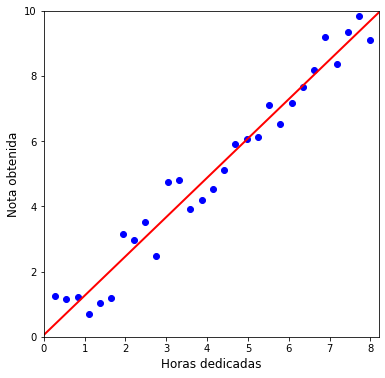

In [2]:
from sklearn.linear_model import LinearRegression

# Generar datos alineados
np.random.seed(42)
X = np.linspace(0, 8, 30).reshape(-1, 1)
y = np.linspace(0, 10, 30) + np.random.uniform(-1, 1, 30)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predecir valores utilizando el modelo entrenado
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Graficar los puntos y la regresión
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Puntos')
plt.plot(X_pred, y_pred, color='red', linewidth=2, label='Regresión')
plt.xlabel('Horas dedicadas', size=12)
plt.ylabel('Nota obtenida',size=12)
# Establecer los límites de los ejes
plt.xlim(0, 8.2)
plt.ylim(0, 10)
plt.show()


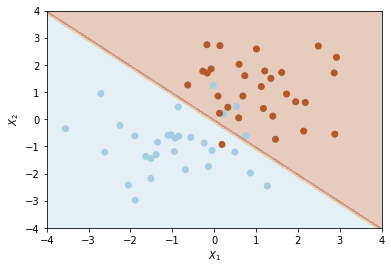

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generar datos aleatorios para dos clases
np.random.seed(0)
X = np.r_[np.random.randn(30, 2) - [1, 1], np.random.randn(30, 2) + [1, .8]]
y = [-1] * 30 + [1] * 30  # Etiquetas para las dos clases

# Crear el modelo SVM de clasificación
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Crear una malla para el gráfico
xx, yy = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-4, 4, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crear una máscara binaria para el fondo
mask = (Z > 0).astype(int)

# Colores de fondo para las dos clases
plt.contourf(xx, yy, mask, cmap=plt.cm.Paired, alpha = 0.3)

# Graficar los puntos de las dos clases
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Etiquetas y título
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.show()


Ejemplo de regresión lineal sobre target binario para la parte teórica:

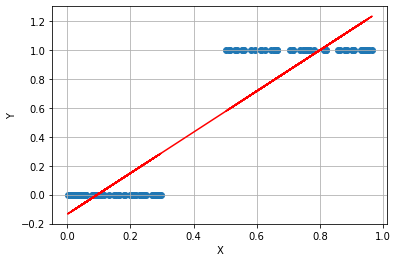

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar primer conjunto de puntos
x1 = np.random.uniform(0, 0.3, 50)
y1 = np.zeros_like(x1)

# Generar segundo conjunto de puntos
x2 = np.random.uniform(0.5, 1, 50)
y2 = np.ones_like(x2)

# Combinar los conjuntos de puntos
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

# Ajustar una regresión lineal
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
predicted_y = model.predict(x.reshape(-1, 1))

# Visualizar los datos y la regresión lineal
plt.scatter(x, y, label='Conjunto de puntos')
plt.plot(x, predicted_y, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)  # Agregar cuadrícula
plt.show()


Ejemplo de regresión logística sobre target binario para la parte teórica:

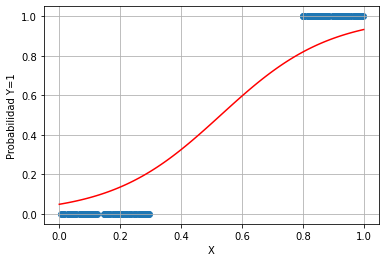

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generar primer conjunto de puntos
x1 = np.random.uniform(0, 0.3, 70)
y1 = np.zeros_like(x1)

# Generar segundo conjunto de puntos
x2 = np.random.uniform(0.8, 1, 70)
y2 = np.ones_like(x2)

# Combinar los conjuntos de puntos
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

# Ajustar una regresión logística
model = LogisticRegression()
model.fit(x.reshape(-1, 1), y)

# Crear puntos para la línea de decisión (región de predicción)
x_decision = np.linspace(0, 1, 100)
y_decision = model.predict_proba(x_decision.reshape(-1, 1))[:, 1]

# Visualizar los datos y la regresión logística
plt.scatter(x, y, label='Conjunto de puntos')
plt.plot(x_decision, y_decision, color='red', label='Regresión logística')
plt.xlabel('X')
plt.ylabel('Probabilidad Y=1')
plt.grid(True)  # Agregar cuadrícula
plt.show()


Cargo los datos y comienzo conel preprocesado:

In [5]:
data = pd.read_excel('C:/Users/Usuario/OneDrive/Master/TFM/BasesDatos/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [6]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Importante fijarse en que Income está en medidas anuales y CCAvg en mensuales. Se multiplicará en primer lugar CCAvg por 12 para que todo esté en las mismas medidas. 

In [7]:
data['CCAvg'] = data['CCAvg']*12

In [8]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data['Mortgage'].quantile(0.69)

0.0

Medidas descriptivas de las variables continuas: 

In [11]:
data[['Age', 'Experience', 'Income', 'ZIP Code', 'Mortgage', 'CCAvg']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.33840,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.10460,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.77420,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.50300,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Mortgage,5000.0,56.49880,101.713802,0.0,0.0,0.0,101.0,635.0
CCAvg,5000.0,23.25496,20.971994,0.0,8.4,18.0,30.0,120.0


Se puede observar cómo la variable Experience presenta valores negativos. Se analizarán más adelante. Continuo con el análisis de la variable objetivo:

<AxesSubplot: title={'center': 'Persoanl Loan'}>

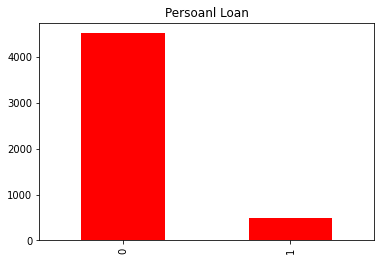

In [12]:
data['Personal Loan'].value_counts().plot(kind='bar',color='red',linewidth = 3,title='Persoanl Loan')

In [13]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [14]:
data['Personal Loan'].value_counts()/5000

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

La variable target está muy desbalanceada, hay un 90.4% de no y un 9.6% de sí. Por tanto, se comenzará el análisis sin balancear la variable, y más adelante se estudiará si es necesario balancearla.

Gráfico de barras para las variables categóricas:

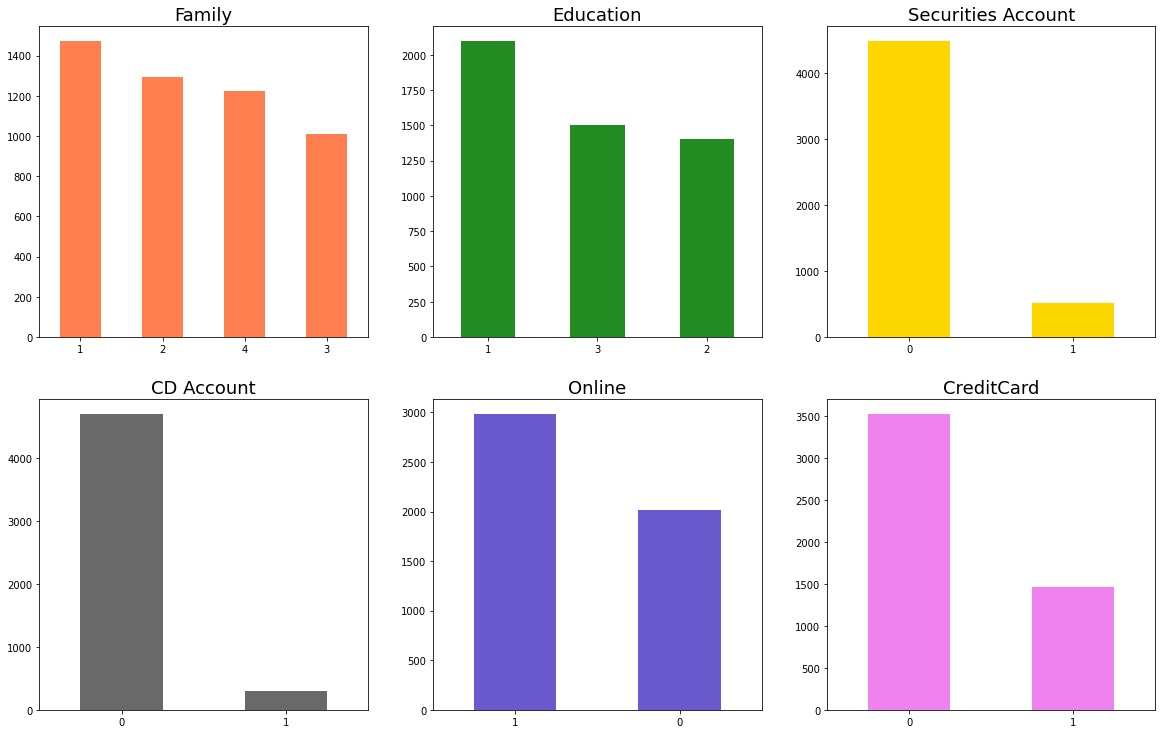

In [15]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 3, 1)
data['Family'].value_counts().plot(kind='bar', color='coral', linewidth=3)
plt.title('Family', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.subplot(6, 3, 2)
data['Education'].value_counts().plot(kind='bar', color='forestgreen', linewidth=3)
plt.title('Education', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.subplot(6, 3, 3)
data['Securities Account'].value_counts().plot(kind='bar', color='gold', linewidth=3)
plt.title('Securities Account', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.subplot(6, 3, 4)
data['CD Account'].value_counts().plot(kind='bar', color='dimgray', linewidth=3)
plt.title('CD Account', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.subplot(6, 3, 5)
data['Online'].value_counts().plot(kind='bar', color='slateblue', linewidth=3)
plt.title('Online', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.subplot(6, 3, 6)
data['CreditCard'].value_counts().plot(kind='bar', color='violet', linewidth=3)
plt.title('CreditCard', fontsize=18)  # Aumentar el tamaño de la fuente
plt.xticks(rotation=0)

plt.show()


Ahora estudio en mayor profundidad cada una de las variables. Comienzo con las discretas:

Family:

In [16]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

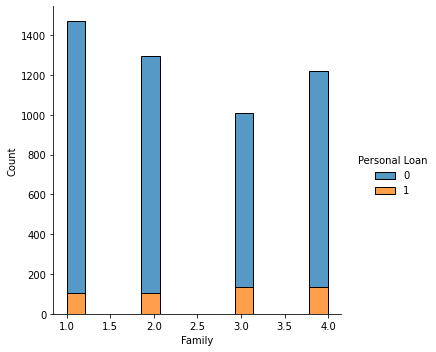

In [17]:
sns.displot(data, x="Family", hue="Personal Loan",multiple="stack")

In [18]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['Family'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

Family,1,2,3,4
Personal Loan,,,,
0,0.92731,0.91821,0.868317,0.890344
1,0.07269,0.08179,0.131683,0.109656


Education:

In [19]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

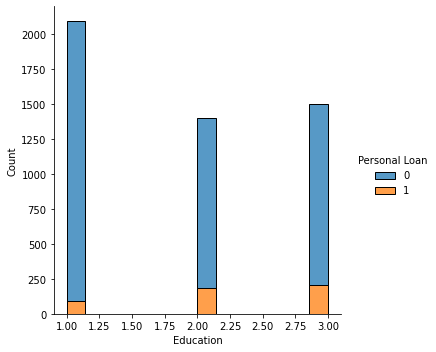

In [20]:
sns.displot(data, x="Education", hue="Personal Loan",multiple="stack")

In [21]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['Education'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

Education,1,2,3
Personal Loan,,,
0,0.95563,0.870278,0.863424
1,0.04437,0.129722,0.136576


Securities Account:

In [22]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

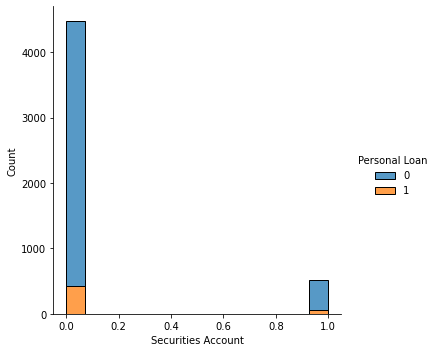

In [23]:
sns.displot(data, x="Securities Account", hue="Personal Loan",multiple="stack")

In [24]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['Securities Account'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

Securities Account,0,1
Personal Loan,,
0,0.906208,0.885057
1,0.093792,0.114943


CD Account:

In [25]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

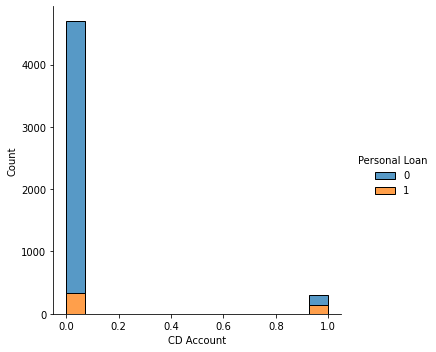

In [26]:
sns.displot(data, x="CD Account", hue="Personal Loan",multiple="stack")

In [27]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['CD Account'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

CD Account,0,1
Personal Loan,,
0,0.927629,0.536424
1,0.072371,0.463576


Online:

In [28]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

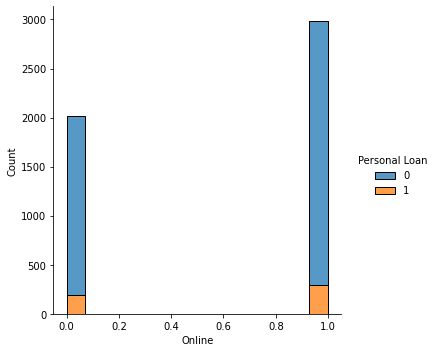

In [29]:
sns.displot(data, x="Online", hue="Personal Loan",multiple="stack")

In [30]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['Online'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

Online,0,1
Personal Loan,,
0,0.90625,0.90248
1,0.09375,0.09752


CreditCard:

In [31]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

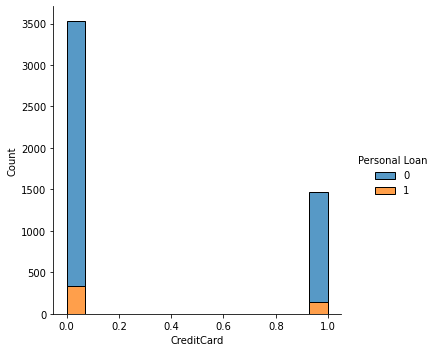

In [32]:
sns.displot(data, x="CreditCard", hue="Personal Loan",multiple="stack")

In [33]:
tabla_contingencia = pd.crosstab(data['Personal Loan'],data['CreditCard'])
probabilidad_condicional = tabla_contingencia / tabla_contingencia.sum(axis=0)
probabilidad_condicional

CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


Represento los histogramas y boxplot de las variables continuas:

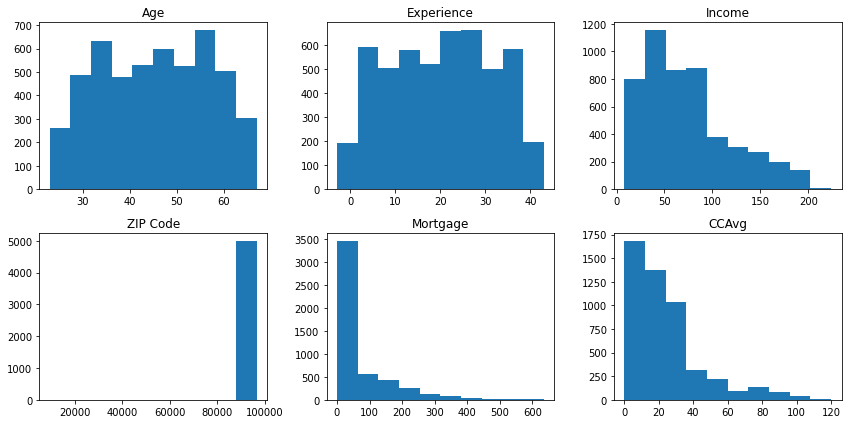

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(['Age', 'Experience', 'Income', 'ZIP Code', 'Mortgage', 'CCAvg']):
    axs[i].hist(data[column], bins=10)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

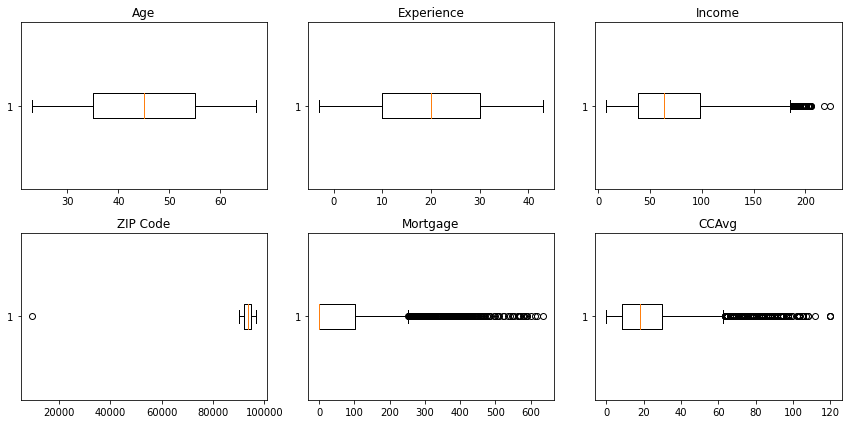

In [35]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(['Age', 'Experience', 'Income', 'ZIP Code', 'Mortgage', 'CCAvg']):
    axs[i].boxplot(data[column], vert=False)
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

Hay un outlier muy claro en la variable ZIP Code. Da la sensacion de estar mal codificado, ya que es un valor que ronda el número 9000, y el resto de datos se encuentran cerca del 90000. 

<AxesSubplot: xlabel='ZIP Code'>

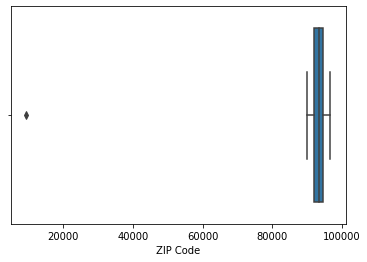

In [36]:
sns.boxplot(x=data['ZIP Code']) 

In [37]:
data['ZIP Code'].min()

9307

Se puede tanto eliminar el dato como transformarlo añadiendo simplemente un cero al final, pero al ser un único otulier frente a 5000 observaciones, es mejor eliminarlo:

In [38]:
data = data[(data['ZIP Code']>10000)]

<AxesSubplot: xlabel='ZIP Code'>

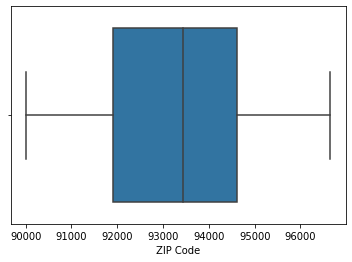

In [39]:
sns.boxplot(x=data['ZIP Code']) 

<AxesSubplot: xlabel='ZIP Code', ylabel='Count'>

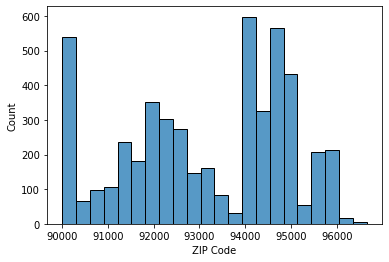

In [40]:
sns.histplot(x=data['ZIP Code'])

Estudio la variable Experience en profundidad, ya que presenta valores negativos. 

In [41]:
data.loc[data['Experience'] < 0, 'Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Según esto, hay 33 personas con -1 año de experiencia laboral, 15 con -2 años de experiencia laboral y 4 con -3 años de experiencia laboral. Como esto no tiene ningún sentido, y en la información sobre el dataset no indican que esto pueda ocurrir por ningún motivo, transformo todos los datos en su valor positivo, ya que pienso que esto se debe a algún tipo de error a la hora de registrar los datos en la base de datos. 

In [42]:
data['Experience'] = data['Experience'].abs()

In [43]:
data['Experience'].min()

0

Implemento el método de tukey para detección de outliers de la siguiente manera:

In [44]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [45]:
outlier_indices, outlier_values = filtrar_outlier_tukey(data['Mortgage'])

[q1=0.000000, q3=101.000000, iqr=101.000000]
[floor=-151.500000, ceiling=252.500000]


In [46]:
outlier_values.sort()
print(outlier_values)

[253, 255, 255, 255, 256, 256, 256, 256, 256, 257, 257, 257, 258, 259, 259, 260, 260, 260, 262, 262, 263, 263, 263, 264, 264, 264, 265, 266, 266, 267, 267, 268, 268, 268, 270, 270, 270, 271, 271, 272, 272, 272, 272, 272, 273, 275, 275, 275, 276, 276, 277, 277, 277, 278, 280, 280, 281, 282, 282, 282, 283, 284, 285, 285, 285, 286, 287, 287, 289, 289, 290, 292, 292, 293, 293, 294, 294, 294, 294, 294, 295, 296, 297, 297, 297, 297, 298, 299, 299, 300, 301, 301, 301, 301, 301, 302, 303, 303, 304, 304, 305, 305, 305, 306, 306, 307, 307, 307, 307, 307, 308, 308, 308, 309, 309, 310, 310, 310, 311, 312, 312, 313, 313, 314, 314, 315, 315, 315, 318, 319, 319, 319, 321, 322, 322, 323, 323, 323, 325, 325, 325, 326, 327, 327, 327, 328, 328, 328, 329, 329, 329, 330, 330, 331, 333, 333, 333, 334, 336, 337, 341, 341, 341, 342, 342, 342, 342, 343, 344, 345, 351, 352, 352, 352, 353, 354, 354, 355, 357, 357, 358, 358, 359, 359, 360, 361, 364, 364, 366, 366, 366, 368, 368, 372, 372, 373, 374, 378, 380, 380,

Hay demasiados outliers como para poder plantearse eliminarlos del conjunto de datos. Además, no hay ningún punto muy alejado del resto, siguen todos un orden muy cercano. 

Represento ahora los boxplot de las variables categóricas agrupadas por la variable objetivo:

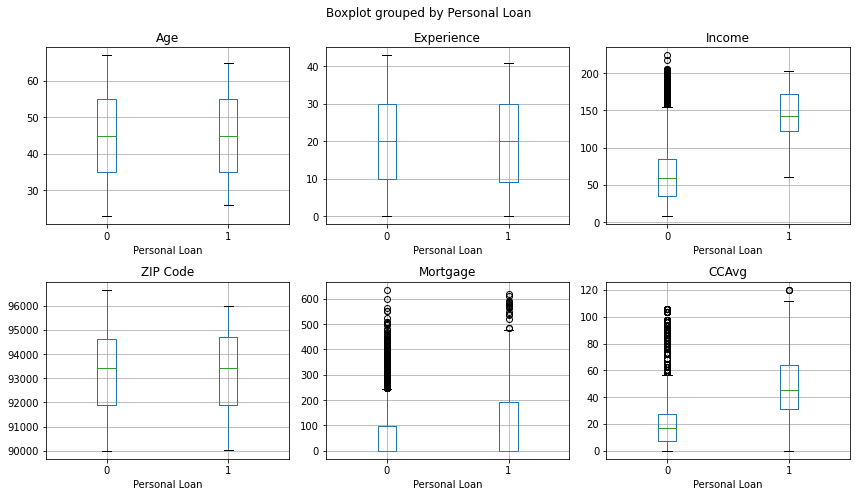

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

for i, variable in enumerate(['Age', 'Experience', 'Income', 'ZIP Code', 'Mortgage', 'CCAvg']):
    row = i // 3
    col = i % 3
    data.boxplot(column=variable, by="Personal Loan", ax=axs[row][col])
    axs[row][col].set_title(variable)
    
plt.tight_layout()
plt.show()

Representando la distribución de las variables continuas respecto al target, se puede ver cómo las que presentan mayores diferencias son **Income, Mortgage y CCAvg**.

Gráfico de correglaciones de las variables continuas:

<AxesSubplot: >

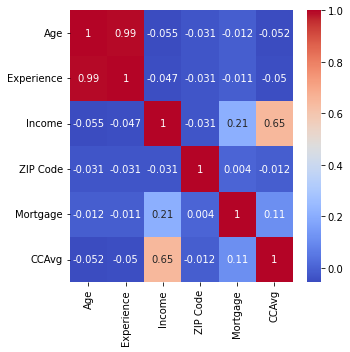

In [48]:
plt.figure(figsize=(5,5))
sns.heatmap(data[['Age', 'Experience', 'Income', 'ZIP Code', 'Mortgage', 'CCAvg']].corr().round(3),annot=True,cmap='coolwarm')

Se observa una correlacion de 0.99 entre la edad y la experiencia, y un 0.65 de correlación entre CCAvg e Income. 

Dado que hemos visto que tanto Age como Experience se distribuyen de la misma forma respecto a la variable target, y además presentan entre ellas una correlación de 0.99, eliminaré una de ellas (en este caso Experience). También eliminaré la variable ID, ya que no tiene sentido mantenerla en el análisis.

In [49]:
data = data.drop(columns=['Experience', 'ID'])

## Codificación de las variables:

Aplico one-hot-encoding a las variables categóricas.

In [50]:
data.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,45,91330,4,12.0,2,0,0,0,0,0,1


In [51]:
# Selecciono las columnas a aplicar one-hot encoding
columnas_encoding = ['Family','Education','Securities Account','CD Account','Online','CreditCard']

# Aplicamos one-hot encoding con get_dummies()
data_encoded = pd.get_dummies(data, columns=columnas_encoding)

In [52]:
data_encoded.head()

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,25,49,91107,19.2,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,1,0
1,45,34,90089,18.0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,39,11,94720,12.0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,35,100,94112,32.4,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,35,45,91330,12.0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1


Ahora normalizo las variables:

In [53]:
# Creamos una instancia de MinMaxScaler
scaler = MinMaxScaler()

# Ajustamos el scaler con los datos
scaler.fit(data_encoded)

# Transformamos los datos en el rango [0, 1]
normalized_data = scaler.transform(data_encoded)

# Creamos un nuevo dataframe con los datos normalizados
data_normalized = pd.DataFrame(normalized_data, columns=data_encoded.columns)

In [54]:
data_normalized.head()

,Age,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Family_1,Family_2,Family_3,Family_4,...,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1
0,0.045455,0.189815,0.165814,0.16,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.500000,0.120370,0.012639,0.15,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.363636,0.013889,0.709449,0.10,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.272727,0.425926,0.617966,0.27,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.272727,0.171296,0.199368,0.10,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Construcción de modelos predictivos

Comienzo con la construcción de los modelos predictivos. En primer lugar lo haré con la variable objetivo desbalanceada. Divido los datos en un conjunto de entrenamiento y otro de test:

In [55]:
#Con los dos dataframes:

y = np.array(data_normalized['Personal Loan'])
X = data_normalized.drop(['Personal Loan'],axis=1)

#Divido los datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 20)

### Logística

Calculo el mejor hiperparámetro C de regularización:

Datos entrenamiento:  (3499, 20)
Datos test:  (1500, 20)
Mejor conjunto de parámetros:  {'C': 100}
Mejor puntaje de validación cruzada:  0.7561406939313313


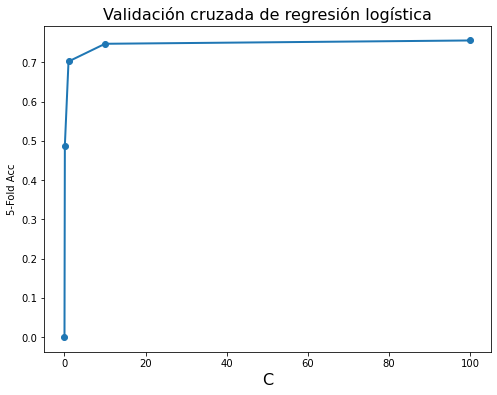

In [153]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Crea una instancia de LogisticRegression()
lr = LogisticRegression()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train, y_train)

# Imprime el mejor conjunto de parámetros y el puntaje de validación cruzada promedio asociado
print("Mejor conjunto de parámetros: ", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

# Extrae los puntajes de validación cruzada para cada valor de C
scores = np.array(grid_search.cv_results_['mean_test_score'])

# Extrae los valores de C que se probaron
C_vector = param_grid['C']

# Grafica los puntajes de validación cruzada en función de C
plt.figure(figsize=(8,6))
plt.plot(C_vector, scores, '-o', linewidth=2, marker='o')
plt.xlabel('C', fontsize=16)
plt.ylabel('5-Fold Acc')
plt.title('Validación cruzada de regresión logística', fontsize=16)
plt.show()

In [56]:
#Initializing and fitting the logistic regression model
lr = LogisticRegression(max_iter=1000,C=100)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
y_probas_lr = lr.predict_proba(X_test)

In [135]:
#Almaceno para más adelante las matrices de confusión:
matrices = []

In [136]:
matrices.append(confusion_matrix(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

[[1319   15]
 [  46  120]]


### Árboles de decisión

In [158]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

max_depth_vector = list(range(1, 11)) #Parámetro de profundidad
criterion_options = ['gini', 'entropy','log_loss']  # Agregamos las opciones de criterion (para evaluar la división de los nodos)
param_grid = {'max_depth': max_depth_vector, 'criterion': criterion_options}  
grid = GridSearchCV(DecisionTreeClassifier(), scoring='f1', param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Datos entrenamiento:  (3499, 20)
Datos test:  (1500, 20)
best mean cross-validation score: 0.922
best parameters: {'criterion': 'entropy', 'max_depth': 4}


In [58]:
dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy',random_state=3)
dt.fit(X_train,y_train)
y_pred_tree = dt.predict(X_test)
y_probas_tree = dt.predict_proba(X_test)

In [138]:
matrices.append(confusion_matrix(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

[[1322   12]
 [  24  142]]


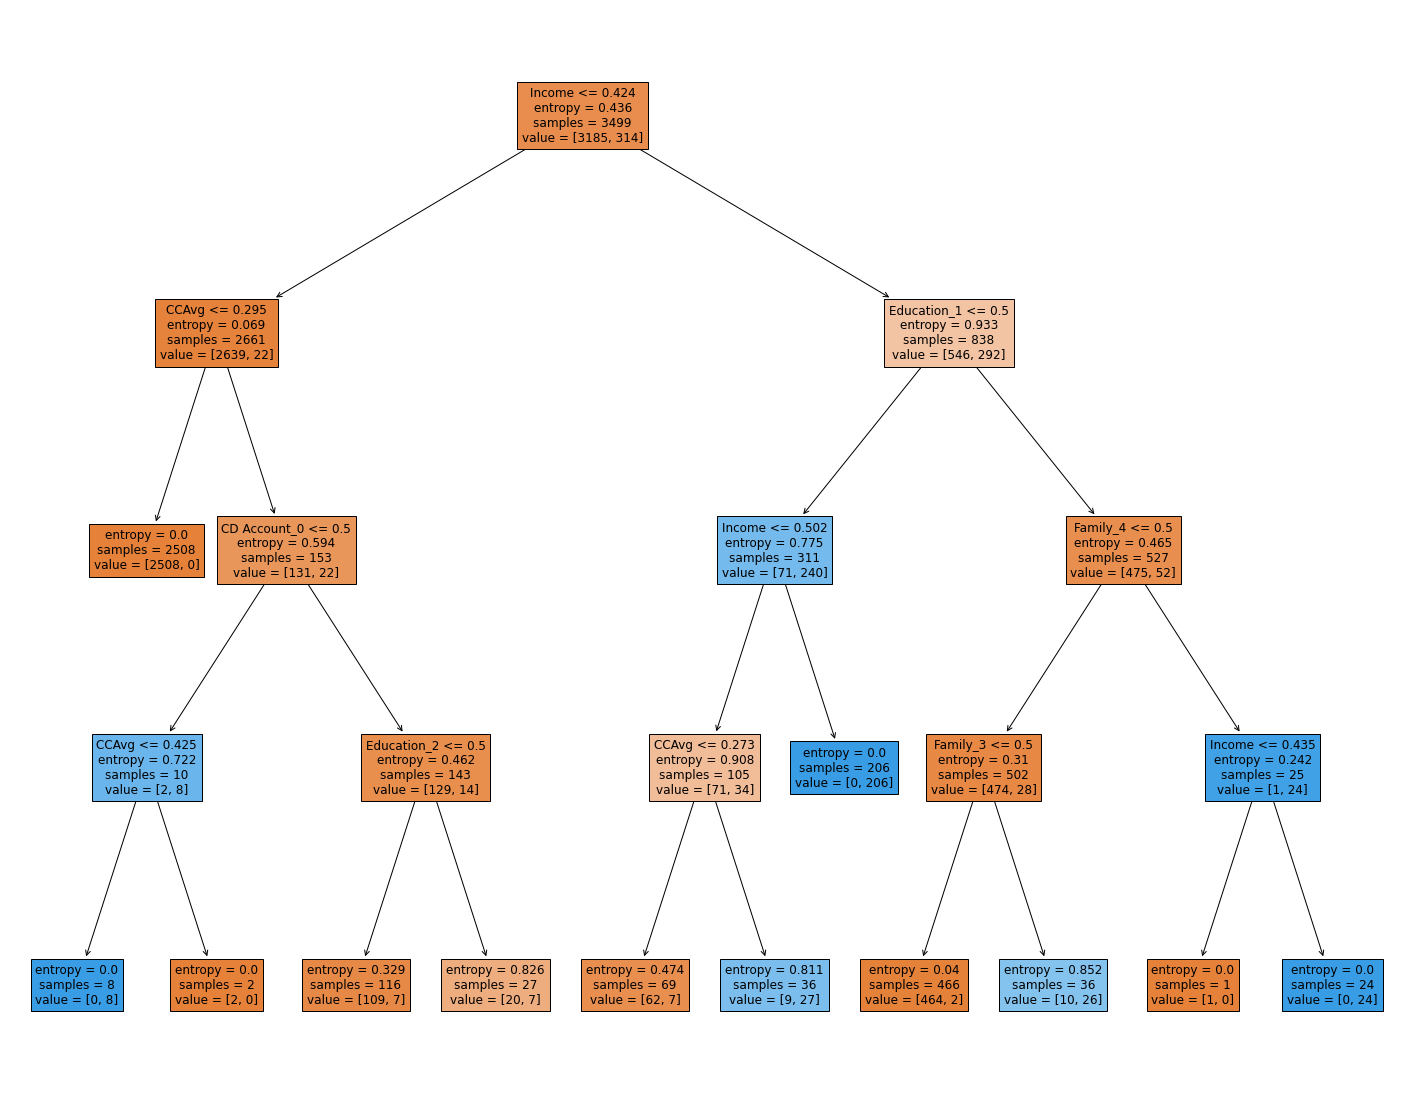

In [60]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X.columns, 
                   filled=True)

### Random Forest

In [91]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None]
}

# Crea una instancia de RandomForestClassifier()
rf = RandomForestClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'max_depth': 20, 'n_estimators': 1000}
Mejor puntaje de validación cruzada:  0.9188256452162668


In [61]:
rf = RandomForestClassifier(n_estimators=1000,criterion='gini',max_depth=20,random_state=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_probas_rf = rf.predict_proba(X_test)

In [139]:
matrices.append(confusion_matrix(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

[[1332    2]
 [  28  138]]


### Boosting: Adaboost

In [164]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [50, 100, 500, 1000],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Crea una instancia de AdaBoostClassifier()
ab = AdaBoostClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 1000}
Mejor puntaje de validación cruzada:  0.8277081706087644


In [63]:
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1,random_state = 3)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
y_probas_ada = ada.predict_proba(X_test)

In [140]:
matrices.append(confusion_matrix(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))

[[1315   19]
 [  40  126]]


### XGBoosting

##### Hiperparámetros:

* **max_depth:** La profundidad máxima de cada árbol en el conjunto. Si se establece demasiado alto, el modelo puede sobreajustar los datos de entrenamiento.

* **learning_rate:** La tasa de aprendizaje del modelo, que controla la contribución de cada árbol. Valores más pequeños pueden hacer que el modelo sea más preciso, pero también pueden aumentar el tiempo de entrenamiento.

* **n_estimators:** El número de árboles en el conjunto. Un valor más alto puede hacer que el modelo sea más preciso, pero también aumentará el tiempo de entrenamiento.

* **subsample:** El porcentaje de observaciones de entrenamiento que se usan en cada árbol. Un valor más bajo puede hacer que el modelo sea menos preciso, pero también puede reducir el riesgo de sobreajuste.

* **colsample_bytree:** El porcentaje de características que se utilizan para cada árbol. Un valor más bajo puede hacer que el modelo sea menos preciso, pero también puede reducir el riesgo de sobreajuste.


Por defecto, los valores de los hiperparámetros en XGBoost son los siguientes:

* max_depth: 6
* learning_rate: 0.3
* n_estimators: 100
* subsample: 1
* colsample_bytree: 1

In [97]:
# Define los valores que deseas probar para los hiperparámetros del modelo
# Prueba con mas parametros. Predice igual
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.3, 0.1, 0.01],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, .65, 1],
    'colsample_bytree': [0.65, 0.8, 1]
}
 
# Crea una instancia de XGBClassifier()
xgb = XGBClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.5}
Mejor puntaje de validación cruzada:  0.9394482633041685


In [65]:
xgb_model = XGBClassifier(objective="binary:logistic", max_depth=3,learning_rate=0.1,
                              n_estimators=500,subsample=0.5,colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_probas_xgb = xgb_model.predict_proba(X_test)

In [141]:
matrices.append(confusion_matrix(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

[[1331    3]
 [  21  145]]


### Red Neuronal

Se realizan muchas pruebas para la red neuronal, variando el número de capas ocultas (de 2 a 4) y la cantidad de neuronas por capa (5, 10, 15 o 20), y la combinación que mejor resultado ha dado es la siguiente: 

In [67]:
model = Sequential()
model.add(Dense(20, input_dim=20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
110/110 [==============================] - 2s 2ms/step - loss: 0.4705 - accuracy: 0.7625
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.9103
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.2154 - accuracy: 0.9137
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1680 - accuracy: 0.9386
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9537
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9654
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9748
Epoch 8/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0676 - accuracy: 0.9800
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9809
Epoch 10/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9817

In [142]:
# Predict the values from the test dataset
y_pred_rn = model.predict(X_test)
y_pred_rn = (y_pred_rn > 0.5).astype(int)
# compute the confusion matrix
matrices.append(confusion_matrix(y_test, y_pred_rn))
print(confusion_matrix(y_test, y_pred_rn))

[[1328    6]
 [  28  138]]


#### IMPORTANTE: Para utilizar la función predict_proba es necesario crear un entorno en el que se tenga una versión de Tensorflow anterior o igual a la versión 2.6.0.

In [70]:
#Para la curva lift
y_probas_rn = model.predict_proba(X_test)
y_probas_rn = np.concatenate((1-y_probas_rn,y_probas_rn), axis=1)

## SMOTE para balancear datos.


In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [72]:
#Convierto el target en int, ya que estaba en float.
y_train_smote = np.asarray(y_train_smote , dtype = 'int')
print(y_train_smote)

[0 0 0 ... 1 1 1]


In [74]:
#Compruebo que los datos han quedado balanceados:
y = np.bincount(y_train_smote)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

array([[   0, 3185],
       [   1, 3185]], dtype=int64)

Una vez se han balanceado los datos, procedo a construir de nuevo los modelos con los datos balanceados para comprobar si se ha producio alguna mejora. 

## Logística SMOTE

Datos entrenamiento:  (6370, 20)
Datos test:  (1500, 20)
Mejor conjunto de parámetros:  {'C': 10}
Mejor puntaje de validación cruzada:  0.9251258768962133


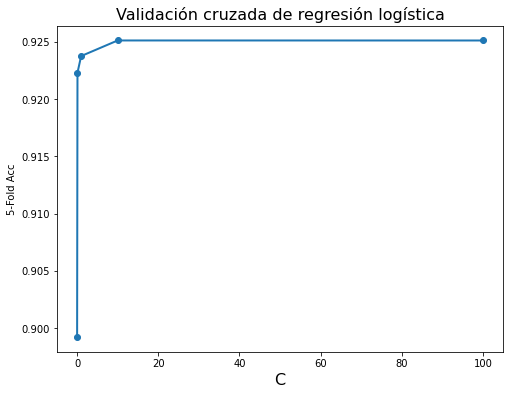

In [75]:
print('Datos entrenamiento: ', X_train_smote.shape)
print('Datos test: ', X_test.shape)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Crea una instancia de LogisticRegression()
lr = LogisticRegression()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_smote, y_train_smote)

# Imprime el mejor conjunto de parámetros y el puntaje de validación cruzada promedio asociado
print("Mejor conjunto de parámetros: ", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

# Extrae los puntajes de validación cruzada para cada valor de C
scores = np.array(grid_search.cv_results_['mean_test_score'])

# Extrae los valores de C que se probaron
C_vector = param_grid['C']

# Grafica los puntajes de validación cruzada en función de C
plt.figure(figsize=(8,6))
plt.plot(C_vector, scores, '-o', linewidth=2, marker='o')
plt.xlabel('C', fontsize=16)
plt.ylabel('5-Fold Acc')
plt.title('Validación cruzada de regresión logística', fontsize=16)
plt.show()

In [76]:
#Initializing and fitting the logistic regression model
lr = LogisticRegression(C=10,max_iter=1000)
lr.fit(X_train_smote,y_train_smote)
y_pred_smote_lr= lr.predict(X_test)
y_probas_smote_lr = lr.predict_proba(X_test)

In [143]:
matrices.append(confusion_matrix(y_test, y_pred_smote_lr))
print(confusion_matrix(y_test, y_pred_smote_lr))

[[1215  119]
 [  23  143]]


### Árboles de decisión SMOTE


In [79]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

max_depth_vector = list(range(1, 11)) #Parámetro de profundidad
criterion_options = ['gini', 'entropy','log_loss']  # Agregamos las opciones de criterion (para evaluar la división de los nodos)
param_grid = {'max_depth': max_depth_vector, 'criterion': criterion_options}  

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'f1', param_grid=param_grid, cv = 5)
grid.fit(X_train_smote, y_train_smote)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Datos entrenamiento:  (3499, 20)
Datos test:  (1500, 20)
best mean cross-validation score: 0.986
best parameters: {'criterion': 'log_loss', 'max_depth': 10}


In [80]:
dt = DecisionTreeClassifier(max_depth = 10, criterion = 'log_loss',random_state=3)
dt.fit(X_train_smote,y_train_smote)
y_pred_smote_tree = dt.predict(X_test)
y_probas_smote_tree = dt.predict_proba(X_test)

In [144]:
matrices.append(confusion_matrix(y_test, y_pred_smote_tree))
print(confusion_matrix(y_test, y_pred_smote_tree))

[[1303   31]
 [  16  150]]


## RANDOM FOREST SMOTE

In [82]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [100, 200, 500,1000],
    'max_depth': [5, 10, 20, None]
}

# Crea una instancia de RandomForestClassifier()
rf = RandomForestClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_smote, y_train_smote)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'max_depth': None, 'n_estimators': 500}
Mejor puntaje de validación cruzada:  0.992476666840448


In [84]:
rf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=None,random_state=3)
rf.fit(X_train_smote,y_train_smote)
y_pred_smote_rf = rf.predict(X_test)
y_probas_smote_rf = rf.predict_proba(X_test)

In [145]:
matrices.append(confusion_matrix(y_test, y_pred_smote_rf))
print(confusion_matrix(y_test, y_pred_smote_rf))

[[1328    6]
 [  16  150]]


## BOOSTING: ADABOOST SMOTE

In [86]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [100, 200 ,500, 1000],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Crea una instancia de AdaBoostClassifier()
ab = AdaBoostClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_smote, y_train_smote)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'learning_rate': 1.0, 'n_estimators': 1000}
Mejor puntaje de validación cruzada:  0.9701605707185204


In [87]:
ada = AdaBoostClassifier(n_estimators=1000,learning_rate=1.0,random_state = 3)
ada.fit(X_train_smote,y_train_smote)
y_pred_smote_ada = ada.predict(X_test)
y_probas_smote_ada = ada.predict_proba(X_test)

In [146]:
matrices.append(confusion_matrix(y_test, y_pred_smote_ada))
print(confusion_matrix(y_test, y_pred_smote_ada))

[[1285   49]
 [  27  139]]


### XGBoost SMOTE

In [90]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.3, 0.1, 0.01],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, .65, 1],
    'colsample_bytree': [0.65, 0.8, 1]
}
 
# Crea una instancia de XGBClassifier()
xgb = XGBClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_smote, y_train_smote)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'colsample_bytree': 0.65, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}
Mejor puntaje de validación cruzada:  0.9948121337120833


In [91]:
xgb_model = XGBClassifier(objective="binary:logistic", max_depth=5,learning_rate=0.1,
                              n_estimators=500,subsample=1,colsample_bytree=0.65, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_smote_xgb = xgb_model.predict(X_test)
y_probas_smote_xgb = xgb_model.predict_proba(X_test)

In [147]:
matrices.append(confusion_matrix(y_test, y_pred_smote_xgb))
print(confusion_matrix(y_test, y_pred_smote_xgb))

[[1328    6]
 [  16  150]]


### Red Neuronal SMOTE

In [93]:
model_smote = Sequential()
model_smote.add(Dense(20, input_dim=20, activation='relu'))
model_smote.add(Dense(15, activation='relu'))
model_smote.add(Dense(10, activation='relu'))
model_smote.add(Dense(5, activation='relu'))
model_smote.add(Dense(1, activation='sigmoid'))

In [94]:
model_smote.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_smote.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32)

Epoch 1/50
200/200 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7570
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9099
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1500 - accuracy: 0.9469
Epoch 4/50
200/200 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9626
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9681
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9721
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9758
Epoch 8/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9772
Epoch 9/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9769
Epoch 10/50
200/200 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9788

In [148]:
# Predict the values from the test dataset
y_pred_smote_rn = model_smote.predict(X_test)
y_pred_smote_rn = (y_pred_smote_rn > 0.5).astype(int)
# compute the confusion matrix
matrices.append(confusion_matrix(y_test, y_pred_smote_rn))
print(confusion_matrix(y_test, y_pred_smote_rn))

[[1312   22]
 [  18  148]]


In [96]:
y_probas_rn_smote = model_smote.predict_proba(X_test)
y_probas_rn_smote = np.concatenate((1-y_probas_rn_smote,y_probas_rn_smote), axis=1)

### Bajomuestreo


In [97]:
# X es la matriz de características y y es el target
# X e y deben tener la misma cantidad de filas

# Se crea una instancia del objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Se aplica el submuestreo a X e y
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [98]:
#Convierto el target en int, ya que estaba en float.
y_train_under = np.asarray(y_train_under , dtype = 'int')
print(y_train_under)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [99]:
#Checking for imbalances in the training data
y = np.bincount(y_train_under)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

array([[  0, 314],
       [  1, 314]], dtype=int64)

### Logística Bajomuestreo

Datos entrenamiento:  (628, 20)
Datos test:  (1500, 20)
Mejor conjunto de parámetros:  {'C': 10}
Mejor puntaje de validación cruzada:  0.9176180428832253


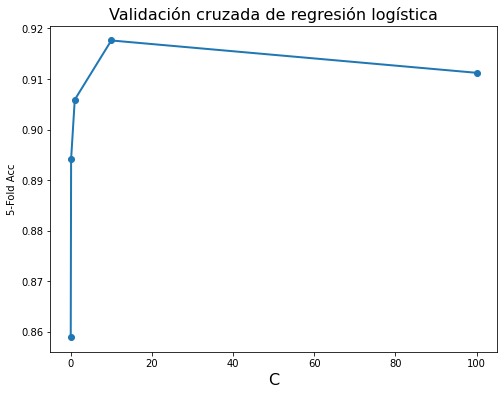

In [100]:
print('Datos entrenamiento: ', X_train_under.shape)
print('Datos test: ', X_test.shape)

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Crea una instancia de LogisticRegression()
lr = LogisticRegression()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_under, y_train_under)

# Imprime el mejor conjunto de parámetros y el puntaje de validación cruzada promedio asociado
print("Mejor conjunto de parámetros: ", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

# Extrae los puntajes de validación cruzada para cada valor de C
scores = np.array(grid_search.cv_results_['mean_test_score'])

# Extrae los valores de C que se probaron
C_vector = param_grid['C']

# Grafica los puntajes de validación cruzada en función de C
plt.figure(figsize=(8,6))
plt.plot(C_vector, scores, '-o', linewidth=2, marker='o')
plt.xlabel('C', fontsize=16)
plt.ylabel('5-Fold Acc')
plt.title('Validación cruzada de regresión logística', fontsize=16)
plt.show()

In [101]:
#Initializing and fitting the logistic regression model
lr = LogisticRegression(C=10,max_iter=1000)
lr.fit(X_train_under,y_train_under)
y_pred_under_lr = lr.predict(X_test)
y_probas_under_lr = lr.predict_proba(X_test)

In [149]:
matrices.append(confusion_matrix(y_test, y_pred_under_lr))
print(confusion_matrix(y_test, y_pred_under_lr))

[[1191  143]
 [  18  148]]


## Árbol Decisión Bajomuestreo


In [103]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

max_depth_vector = list(range(1, 11)) #Parámetro de profundidad
criterion_options = ['gini', 'entropy','log_loss']  # Agregamos las opciones de criterion (para evaluar la división de los nodos)
param_grid = {'max_depth': max_depth_vector, 'criterion': criterion_options}  

grid = GridSearchCV(DecisionTreeClassifier(), scoring= 'f1', param_grid=param_grid, cv = 5)
grid.fit(X_train_under, y_train_under)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Datos entrenamiento:  (3499, 20)
Datos test:  (1500, 20)
best mean cross-validation score: 0.962
best parameters: {'criterion': 'gini', 'max_depth': 6}


In [106]:
dt = DecisionTreeClassifier(max_depth = 6, criterion = 'gini',random_state=3)
dt.fit(X_train_under,y_train_under)
y_pred_under_tree = dt.predict(X_test)
y_probas_under_tree = dt.predict_proba(X_test)

In [150]:
matrices.append(confusion_matrix(y_test, y_pred_under_tree))
print(confusion_matrix(y_test, y_pred_under_tree))

[[1271   63]
 [  13  153]]


### Random Forest Bajomuestreo

In [108]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 20, None]
}

# Crea una instancia de RandomForestClassifier()
rf = RandomForestClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_under, y_train_under)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'max_depth': 20, 'n_estimators': 500}
Mejor puntaje de validación cruzada:  0.9651637943094377


In [109]:
rf = RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=20,random_state=3)
rf.fit(X_train_smote,y_train_smote)
y_pred_under_rf = rf.predict(X_test)
y_probas_under_rf = rf.predict_proba(X_test)

In [151]:
matrices.append(confusion_matrix(y_test, y_pred_under_rf))
print(confusion_matrix(y_test, y_pred_under_rf))

[[1329    5]
 [  16  150]]


## BOOSTING: ADABOOST Bajomuestreo

In [111]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'n_estimators': [100, 200, 1000],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Crea una instancia de AdaBoostClassifier()
ab = AdaBoostClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_under, y_train_under)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'learning_rate': 0.5, 'n_estimators': 100}
Mejor puntaje de validación cruzada:  0.9347170087120306


In [112]:
ada = AdaBoostClassifier(n_estimators=100,learning_rate=0.5,random_state = 3)
ada.fit(X_train_smote,y_train_smote)
y_pred_under_ada = ada.predict(X_test)
y_probas_under_ada = ada.predict_proba(X_test)

In [152]:
matrices.append(confusion_matrix(y_test, y_pred_under_ada))
print(confusion_matrix(y_test, y_pred_under_ada))

[[1257   77]
 [  18  148]]


### XGBOOST Bajomuestreo

In [114]:
# Define los valores que deseas probar para los hiperparámetros del modelo
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.3, 0.1, 0.01],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, .65, 1],
    'colsample_bytree': [0.65, 0.8, 1]
}
 
# Crea una instancia de XGBClassifier()
xgb = XGBClassifier()

# Crea una instancia de GridSearchCV() con los parámetros adecuados
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')

# Ajusta la cuadrícula de búsqueda con tus datos
grid_search.fit(X_train_under, y_train_under)

# Imprime los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje de validación cruzada: ", grid_search.best_score_)

Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Mejor puntaje de validación cruzada:  0.966720642660665


In [115]:
xgb_model = XGBClassifier(objective="binary:logistic", max_depth=5,learning_rate=0.3,
                              n_estimators=100,subsample=1,colsample_bytree=.8, random_state=42)
xgb_model.fit(X_train_under, y_train_under)
y_pred_under_xgb = xgb_model.predict(X_test)
y_probas_under_xgb = xgb_model.predict_proba(X_test)

In [153]:
matrices.append(confusion_matrix(y_test, y_pred_under_xgb))
print(confusion_matrix(y_test, y_pred_under_xgb))

[[1295   39]
 [   8  158]]


### Red Neuronal Bajomuestreo

In [117]:
model_under = Sequential()
model_under.add(Dense(20, input_dim=20, activation='relu'))
model_under.add(Dense(15, activation='relu'))
model_under.add(Dense(10, activation='relu'))
model_under.add(Dense(5, activation='relu'))
model_under.add(Dense(1, activation='sigmoid'))

In [118]:
model_under.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_under.fit(X_train_under, y_train_under, epochs=50, batch_size=32)

Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.7113 - accuracy: 0.4618
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5016
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5685
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.6051
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6433
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6783
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.7277
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8232
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8742
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8965
Epoch 11/50
20/20 [

In [154]:
# Predict the values from the test dataset
y_pred_under_rn = model_under.predict(X_test)
y_pred_under_rn = (y_pred_under_rn > 0.5).astype(int)
# compute the confusion matrix
matrices.append(confusion_matrix(y_test, y_pred_under_rn))
print(confusion_matrix(y_test, y_pred_under_rn))

[[1275   59]
 [  13  153]]


In [120]:
y_probas_rn_under = model_under.predict_proba(X_test)
y_probas_rn_under = np.concatenate((1-y_probas_rn_under,y_probas_rn_under), axis=1)

# COMPARACIÓN DE RESULTADOS

In [121]:
# Definir una función para calcular las métricas de evaluación y agregarlas al DataFrame ordenada por F1, teniendo F1 de primera columna.
def agregar_metricas2(modelo, predicciones, df):
    matriz_confusion = confusion_matrix(y_test, predicciones.round())
    accuracy = accuracy_score(y_test, predicciones.round())
    precision = precision_score(y_test, predicciones.round())
    recall = recall_score(y_test, predicciones.round())
    specificity = matriz_confusion[0,0] / (matriz_confusion[0,0] + matriz_confusion[0,1]) #VN / VN + FP (no está definida en la librería)
    f1_score_ = f1_score(y_test, predicciones.round())
    roc_score = roc_auc_score(y_test, predicciones.round())
    df.loc[len(df)] = [modelo, f1_score_, accuracy, precision, recall, specificity,  roc_score]

In [166]:
# Crear un DataFrame vacío para almacenar las métricas de evaluación
metricas2 = pd.DataFrame(columns=["Modelo", "F1 Score", "Exactitud", "Precisión", "Sensitividad", "Especificidad", "ROC Score"])

# Calcular las métricas de evaluación y agregarlas al DataFrame para cada modelo predictivo
agregar_metricas2("Regresión Logística", y_pred_lr, metricas2)
agregar_metricas2("Árboles de Clasificación", y_pred_tree, metricas2)
agregar_metricas2("Random Forest", y_pred_rf, metricas2)
agregar_metricas2("ADABoost", y_pred_ada, metricas2)
agregar_metricas2("XGBoost", y_pred_xgb, metricas2)
agregar_metricas2("Redes Neuronales", y_pred_rn, metricas2)
# Calcular las métricas de evaluación y agregarlas al DataFrame para cada modelo predictivo
agregar_metricas2("Regresión Logística SMOTE", y_pred_smote_lr, metricas2)
agregar_metricas2("Árboles de Clasificación SMOTE", y_pred_smote_tree, metricas2)
agregar_metricas2("Random Forest SMOTE", y_pred_smote_rf, metricas2)
agregar_metricas2("ADABoost SMOTE", y_pred_smote_ada, metricas2)
agregar_metricas2("XGBoost SMOTE", y_pred_smote_xgb, metricas2)
agregar_metricas2("Redes Neuronales SMOTE", y_pred_smote_rn, metricas2)
# Calcular las métricas de evaluación y agregarlas al DataFrame para cada modelo predictivo
agregar_metricas2("Regresión Logística Bajomuestreo", y_pred_under_lr, metricas2)
agregar_metricas2("Árboles de Clasificación Bajomuestreo", y_pred_under_tree, metricas2)
agregar_metricas2("Random Forest Bajomuestreo", y_pred_under_rf, metricas2)
agregar_metricas2("ADABoost Bajomuestreo", y_pred_under_ada, metricas2)
agregar_metricas2("XGBoost Bajomuestreo", y_pred_under_xgb, metricas2)
agregar_metricas2("Redes Neuronales Bajomuestreo", y_pred_under_rn, metricas2)
# Imprimo el DataFrame con las métricas de evaluación para todos los modelos ordenado por el F1 Score
metricas2.sort_values("F1 Score", ascending=False)


,Modelo,F1 Score,Exactitud,Precisión,Sensitividad,Especificidad,ROC Score
14,Random Forest Bajomuestreo,0.934579,0.986000,0.967742,0.903614,0.996252,0.949933
8,Random Forest SMOTE,0.931677,0.985333,0.961538,0.903614,0.995502,0.949558
10,XGBoost SMOTE,0.931677,0.985333,0.961538,0.903614,0.995502,0.949558
4,XGBoost,0.923567,0.984000,0.979730,0.873494,0.997751,0.935623
2,Random Forest,0.901961,0.980000,0.985714,0.831325,0.998501,0.914913
5,Redes Neuronales,0.890323,0.977333,0.958333,0.831325,0.995502,0.913414
1,Árboles de Clasificación,0.887500,0.976000,0.922078,0.855422,0.991004,0.923213
11,Redes Neuronales SMOTE,0.880952,0.973333,0.870588,0.891566,0.983508,0.937537
16,XGBoost Bajomuestreo,0.870523,0.968667,0.802030,0.951807,0.970765,0.961286
7,Árboles de Clasificación SMOTE,0.864553,0.968667,0.828729,0.903614,0.976762,0.940188


Represento ahora las curvas Lift de cada uno de los modelos.

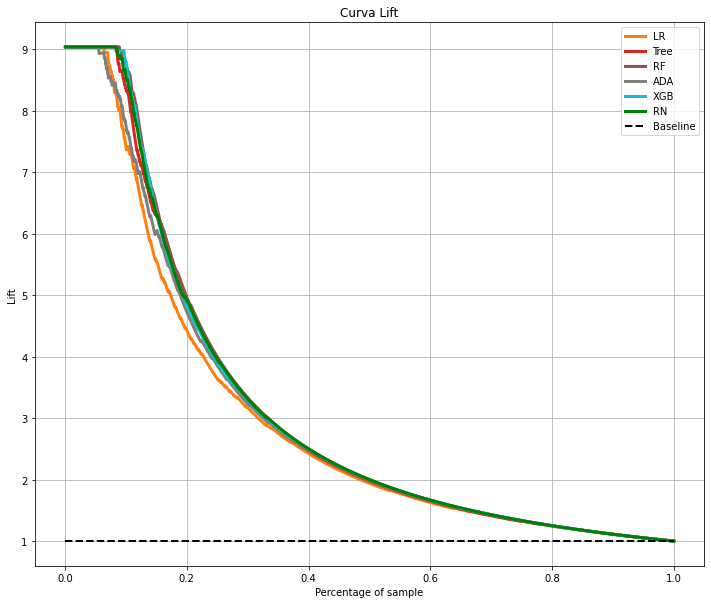

In [123]:
fig, ax = plt.subplots(figsize=(12,10))

skplt.metrics.plot_lift_curve(y_test, y_probas_lr, ax=ax)
del ax.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_tree, ax=ax)
del ax.lines[1]
del ax.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_rf, ax=ax)
del ax.lines[2]
del ax.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_ada, ax=ax)
del ax.lines[3]
del ax.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_xgb, ax=ax)
del ax.lines[4]
del ax.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn,  ax=ax, title='Curva Lift')
del ax.lines[5]
del ax.lines[5]
ax.lines[5].set_color('green')    


legend = ax.legend(['LR', 'Tree', 'RF', 'ADA', 'XGB', 'RN', 'Baseline'])

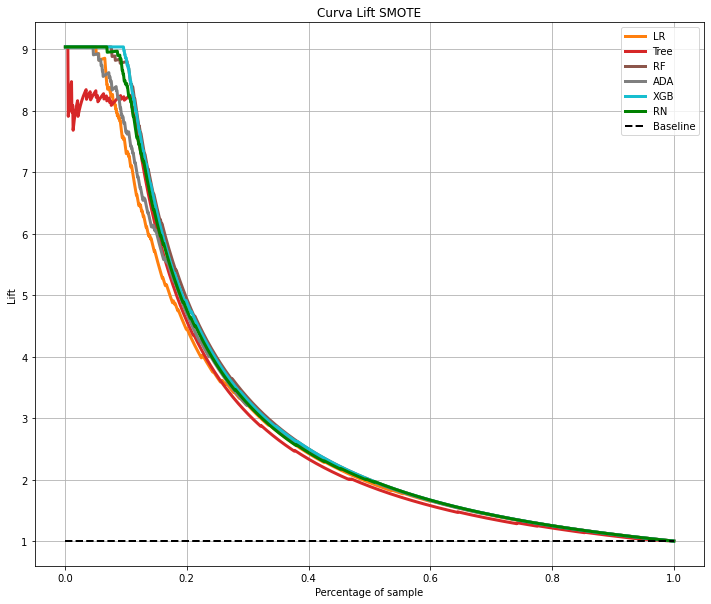

In [124]:
fig, ax = plt.subplots(figsize=(12, 10))

skplt.metrics.plot_lift_curve(y_test, y_probas_smote_lr, ax=ax)
del ax.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_tree, ax=ax)
del ax.lines[1]
del ax.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_rf, ax=ax)
del ax.lines[2]
del ax.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_ada, ax=ax)
del ax.lines[3]
del ax.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_xgb, ax=ax)
del ax.lines[4]
del ax.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn_smote,  ax=ax, title='Curva Lift SMOTE')
del ax.lines[5]
del ax.lines[5]
ax.lines[5].set_color('green')    

legend = ax.legend(['LR', 'Tree', 'RF', 'ADA', 'XGB', 'RN', 'Baseline'])

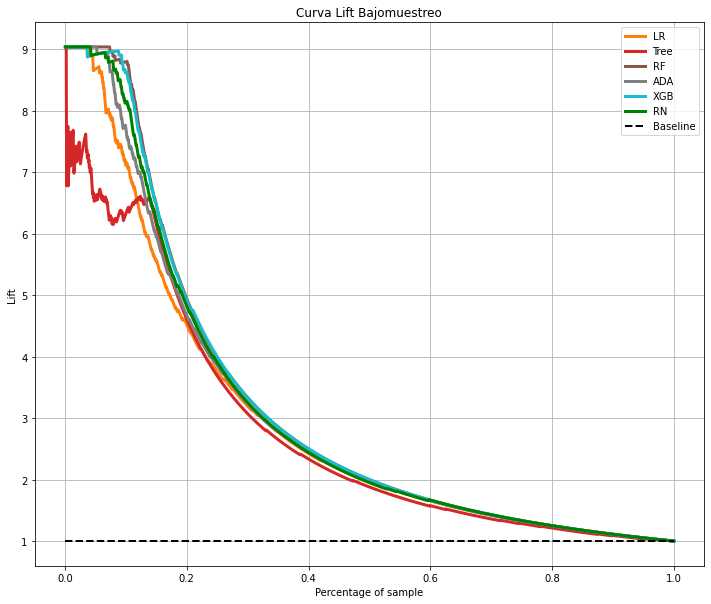

In [125]:
fig, ax = plt.subplots(figsize=(12, 10))

skplt.metrics.plot_lift_curve(y_test, y_probas_under_lr, ax=ax)
del ax.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_tree, ax=ax)
del ax.lines[1]
del ax.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_rf, ax=ax)
del ax.lines[2]
del ax.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_ada, ax=ax)
del ax.lines[3]
del ax.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_xgb, ax=ax)
del ax.lines[4]
del ax.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn_under,  ax=ax, title='Curva Lift Bajomuestreo')
del ax.lines[5]
del ax.lines[5]
ax.lines[5].set_color('green')    

legend = ax.legend(['LR', 'Tree', 'RF', 'ADA', 'XGB', 'RN', 'Baseline'])

Las tres gráficas agrupadas:

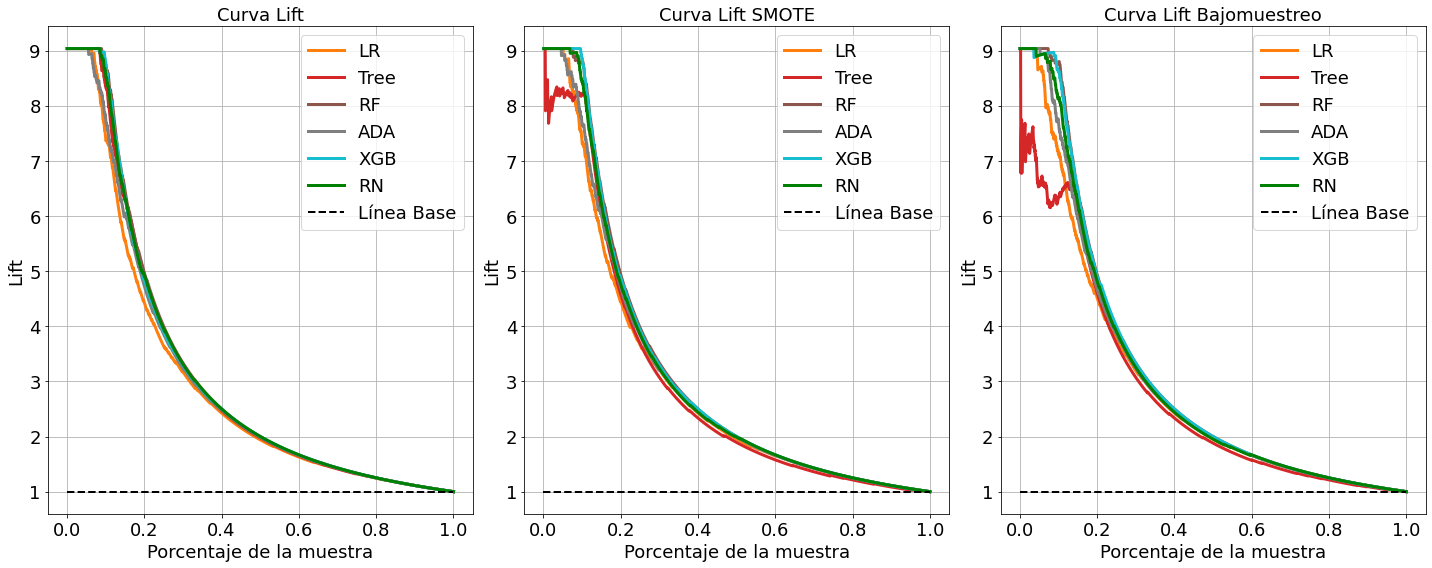

In [165]:
# Crear los subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Subplot 1: Curva Lift
ax1 = axes[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_lr, ax=ax1)
del ax1.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_tree, ax=ax1)
del ax1.lines[1]
del ax1.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_rf, ax=ax1)
del ax1.lines[2]
del ax1.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_ada, ax=ax1)
del ax1.lines[3]
del ax1.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_xgb, ax=ax1)
del ax1.lines[4]
del ax1.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn, ax=ax1, title='Curva Lift')
del ax1.lines[5]
del ax1.lines[5]
ax1.lines[5].set_color('green')    

# Subplot 2: Curva Lift SMOTE
ax2 = axes[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_lr, ax=ax2)
del ax2.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_tree, ax=ax2)
del ax2.lines[1]
del ax2.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_rf, ax=ax2)
del ax2.lines[2]
del ax2.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_ada, ax=ax2)
del ax2.lines[3]
del ax2.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_smote_xgb, ax=ax2)
del ax2.lines[4]
del ax2.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn_smote,  ax=ax2, title='Curva Lift SMOTE')
del ax2.lines[5]
del ax2.lines[5]
ax2.lines[5].set_color('green')    

# Subplot 3: Curva Lift Bajomuestreo
ax3 = axes[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_lr, ax=ax3)
del ax3.lines[0]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_tree, ax=ax3)
del ax3.lines[1]
del ax3.lines[1]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_rf, ax=ax3)
del ax3.lines[2]
del ax3.lines[2]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_ada, ax=ax3)
del ax3.lines[3]
del ax3.lines[3]
skplt.metrics.plot_lift_curve(y_test, y_probas_under_xgb, ax=ax3)
del ax3.lines[4]
del ax3.lines[4]
skplt.metrics.plot_lift_curve(y_test, y_probas_rn_under,  ax=ax3, title='Curva Lift Bajomuestreo')
del ax3.lines[5]
del ax3.lines[5]
ax3.lines[5].set_color('green')    


# Agrandar tamaño de la leyenda y la fuente
for ax in axes:
    leg = ax.legend(['LR', 'Tree', 'RF', 'ADA', 'XGB', 'RN', 'Línea Base'], fontsize=18)  # Ajusta el tamaño de la leyenda

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)  # Ajusta el tamaño de la fuente
        
    ax.set_xlabel('Porcentaje de la muestra', fontsize=18)  # Cambia el label del eje x


# Ajustar espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()



### Representación gráfica de todas las matrices de confusión:


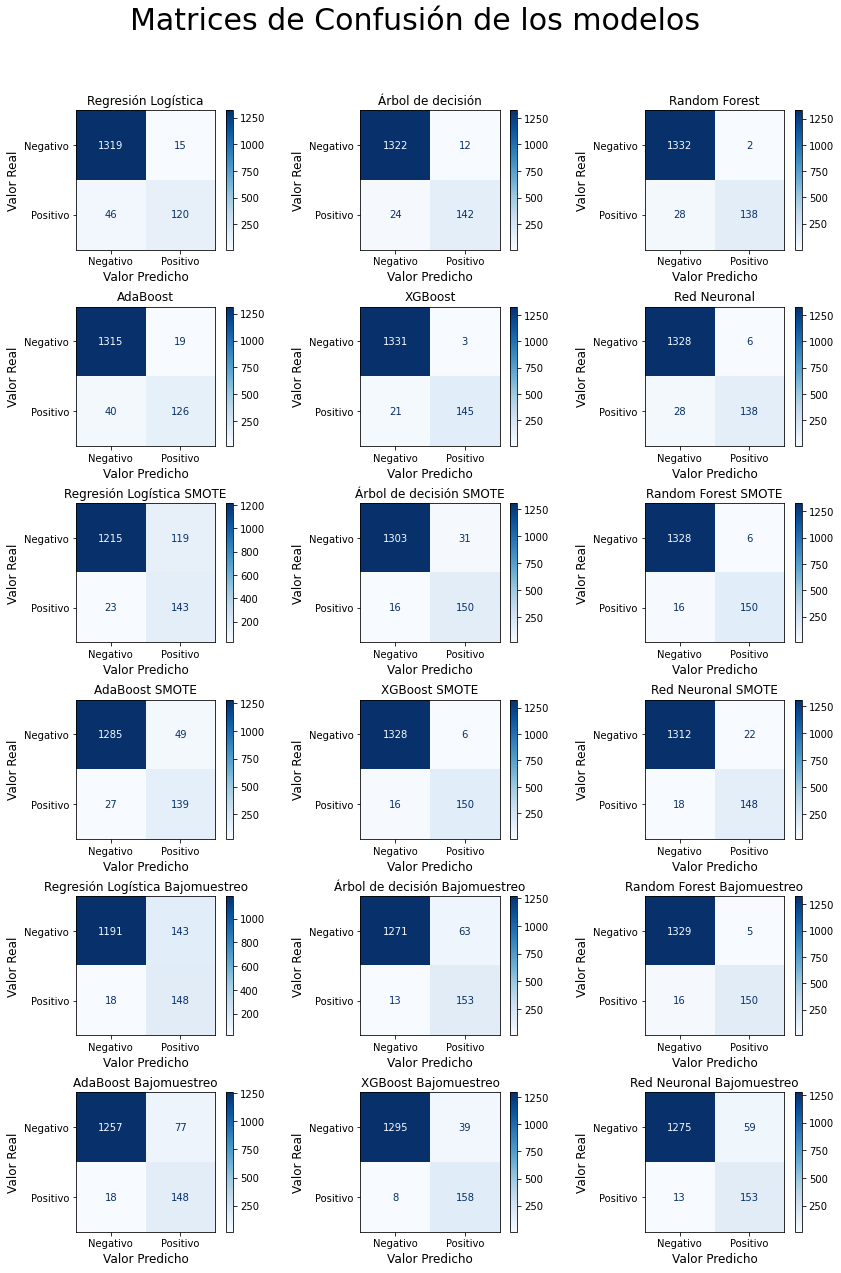

In [159]:
# Define los títulos de los modelos
titulos = ['Regresión Logística', 'Árbol de decisión', 'Random Forest','AdaBoost', 'XGBoost', 'Red Neuronal','Regresión Logística SMOTE', 'Árbol de decisión SMOTE', 'Random Forest SMOTE','AdaBoost SMOTE', 'XGBoost SMOTE', 'Red Neuronal SMOTE','Regresión Logística Bajomuestreo', 'Árbol de decisión Bajomuestreo', 'Random Forest Bajomuestreo','AdaBoost Bajomuestreo', 'XGBoost Bajomuestreo', 'Red Neuronal Bajomuestreo'] 
# Crea una figura con subplots
num_modelos = 18
num_filas = 6  
num_columnas = 3
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 18))

# Itera a través de las matrices de confusión y plótalas con títulos usando ConfusionMatrixDisplay
for i, (matriz, titulo) in enumerate(zip(matrices, titulos)):
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axes[fila, columna]
    
    # Crea el objeto ConfusionMatrixDisplay y plótalo
    display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Negativo', 'Positivo'])
    display.plot(cmap=plt.cm.Blues, ax=ax, values_format='.0f')
    ax.set_xlabel('Valor Predicho', fontsize=12)
    ax.set_ylabel('Valor Real', fontsize=12)
    ax.set_title(titulo)  # Utiliza el título correspondiente

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Puedes agregar un título general si lo deseas
plt.suptitle('Matrices de Confusión de los modelos', fontsize=30)
plt.subplots_adjust(top=0.9)

# Muestra el gráfico
plt.show()
